Extract sample videos of animals from youtube

In [2]:
from pytube import YouTube
import os

def download_youtube_video(url, output_path='downloads'):
    try:
        # Create a YouTube object
        yt = YouTube(url)

        # Get the highest resolution stream
        video_stream = yt.streams.get_highest_resolution()

        # Print video information
        print(f"Video Title: {yt.title}")
        print(f"Video Duration: {yt.length} seconds")
        print(f"Video Resolution: {video_stream.resolution}")

        # Set the output path
        output_file = f"{output_path}/{yt.title}.mp4"

        # Download the video
        print("Downloading...")
        video_stream.download(output_path)

        print(f"Video downloaded to: {output_file}")

    except Exception as e:
        print(f"Error: {e}")


# a dog walking
akita_dog_sample1 = 'https://www.youtube.com/watch?v=3Af2GDhRafQ'
output_path = os.getcwd()
download_youtube_video(akita_dog_sample1, output_path)

Video Title: Dog Walk Cycle Animation Reference - 24fps
Video Duration: 3 seconds
Video Resolution: 720p
Downloading...
Video downloaded to: c:\Users\Austin\Desktop\Agent\animal-pose-estimation/Dog Walk Cycle Animation Reference - 24fps.mp4


Load the videofile to extract frames


In [5]:
import numpy as np
import cv2

# A function to visualize or extract frames to a numpy array
def visualize_video(video_file, extract_frames=False):
    
    # Create a VideoCapture object
    cap = cv2.VideoCapture(video_file)

    # Check if the video file is opened successfully
    if not cap.isOpened():
        print("Error opening the video file")
    else:
        frames = []
        while cap.isOpened():
            # Read the video file frame by frame
            ret, frame = cap.read()

            # print the frame number and timestamp
            # if ret:
            #     print(f"Frame {cap.get(1)}")
            #     print(f"Timestamp {cap.get(0)}")

            # print the frame size
            # if ret:
            #     print(f"Frame Width {cap.get(3)}")
            #     print(f"Frame Height {cap.get(4)}")

            # Check if the frame is valid
            if not ret:
                print("Frame is not valid")
                break

            # if extract_frames is True, then extract the frames to a numpy array
            if extract_frames:
                frames.append(frame)
            else:
                # Display the frame
                cv2.imshow('frame', frame)

                # Press q to quit
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
        # Release the video capture object and close the window
        cap.release()
        cv2.destroyAllWindows()
        
        # if extract_frames is True, then return the frames as a numpy array
        if extract_frames:
            return np.array(frames)


In [6]:
video_file = 'Dog Walk Cycle Animation Reference - 24fps.mp4'
frames = visualize_video(video_file, extract_frames=True)

Frame is not valid


In [39]:
# extract embeddings from the frames
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans


In [68]:
num_samples, height, width, num_channels = frames.shape
# flatten the frames
X = frames.reshape(num_samples, height*width*num_channels)

In [35]:
# Check the shape of the detected frames
detected_frames.shape

num_samples, height, width, num_channels = detected_frames.shape
# flatten the frames
X = detected_frames.reshape(num_samples, height*width*num_channels)

In [31]:
X.shape

(79, 1228800)

In [12]:
import numpy as np

# Example: A list of NumPy arrays with different shapes
list_of_arrays = [np.array([[1, 2], [3, 4]]), np.array([[5, 6, 7], [8, 9, 10]])]

# Flatten the list into a single NumPy array
flattened_array = np.concatenate([arr.flatten() for arr in list_of_arrays])

# Print the result
print(flattened_array)


[ 1  2  3  4  5  6  7  8  9 10]


In [23]:
[[1, 2], [3, 4]]

[[1, 2], [3, 4]]

In [34]:
import numpy as np

# Create a 20x12x3 array
array1 = np.zeros((20, 12, 3))
array2 = np.ones((20, 12, 3))

# Print the array
print(array1.shape)
print(array2.shape)
new_list = np.array([array1, array2])

(20, 12, 3)
(20, 12, 3)


In [38]:
num_samples, height, width, num_channels = new_list.shape
# flatten the frames
new_list.reshape(num_samples, height*width*num_channels)

array([[          0,           0,           0, ...,           0,           0,           0],
       [          1,           1,           1, ...,           1,           1,           1]])

In [30]:
# flatten the 2 arrays
array1_flat = array1.flatten()
array2_flat = array2.flatten()

# conc

(720,)

In [22]:
np.array([[1,2],[3,4]]).shape

(2, 2)

In [36]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from umap import UMAP
from sklearn.cluster import KMeans
# reduce the dimensionality of the frames
n_components = 2
random_state = 42

kmeans = KMeans(n_clusters=1, random_state=random_state)

# PCA
pca = PCA(n_components=n_components, random_state=random_state)
X_pca = pca.fit_transform(X)

# t-SNE
# tsne = TSNE(n_components=n_components, random_state=random_state)
# X_tsne = tsne.fit_transform(X)

# # UMAP
umap = UMAP(n_components=n_components, random_state=random_state)
X_umap = umap.fit_transform(X)

# # K-Means
labels_pca = kmeans.fit_predict(X_pca)
labels_umap = kmeans.fit_predict(X_umap)

c:\Users\Austin\Desktop\Agent\animal-pose-estimation\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Austin\Desktop\Agent\animal-pose-estimation\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


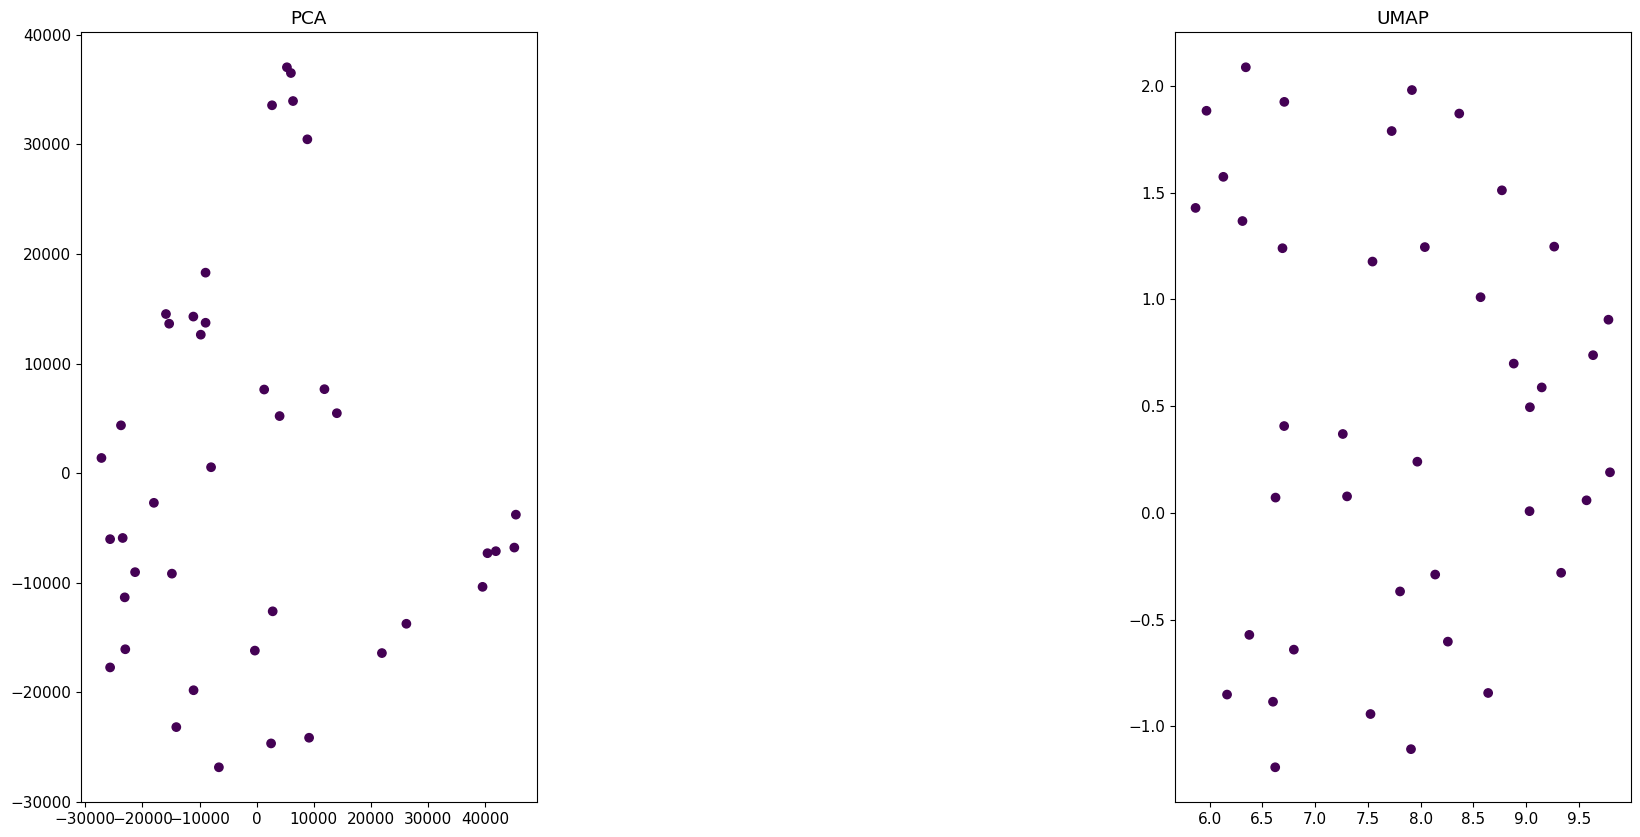

In [37]:
# plot the embeddings
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=labels_pca, cmap='viridis')   
plt.title('PCA')

# plt.subplot(1, 3, 2)
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
# plt.title('TSNE')

plt.subplot(1, 3, 3)
plt.scatter(X_umap[:, 0], X_umap[:, 1],
            c=labels_umap, cmap='viridis')
plt.title('UMAP')

plt.show()

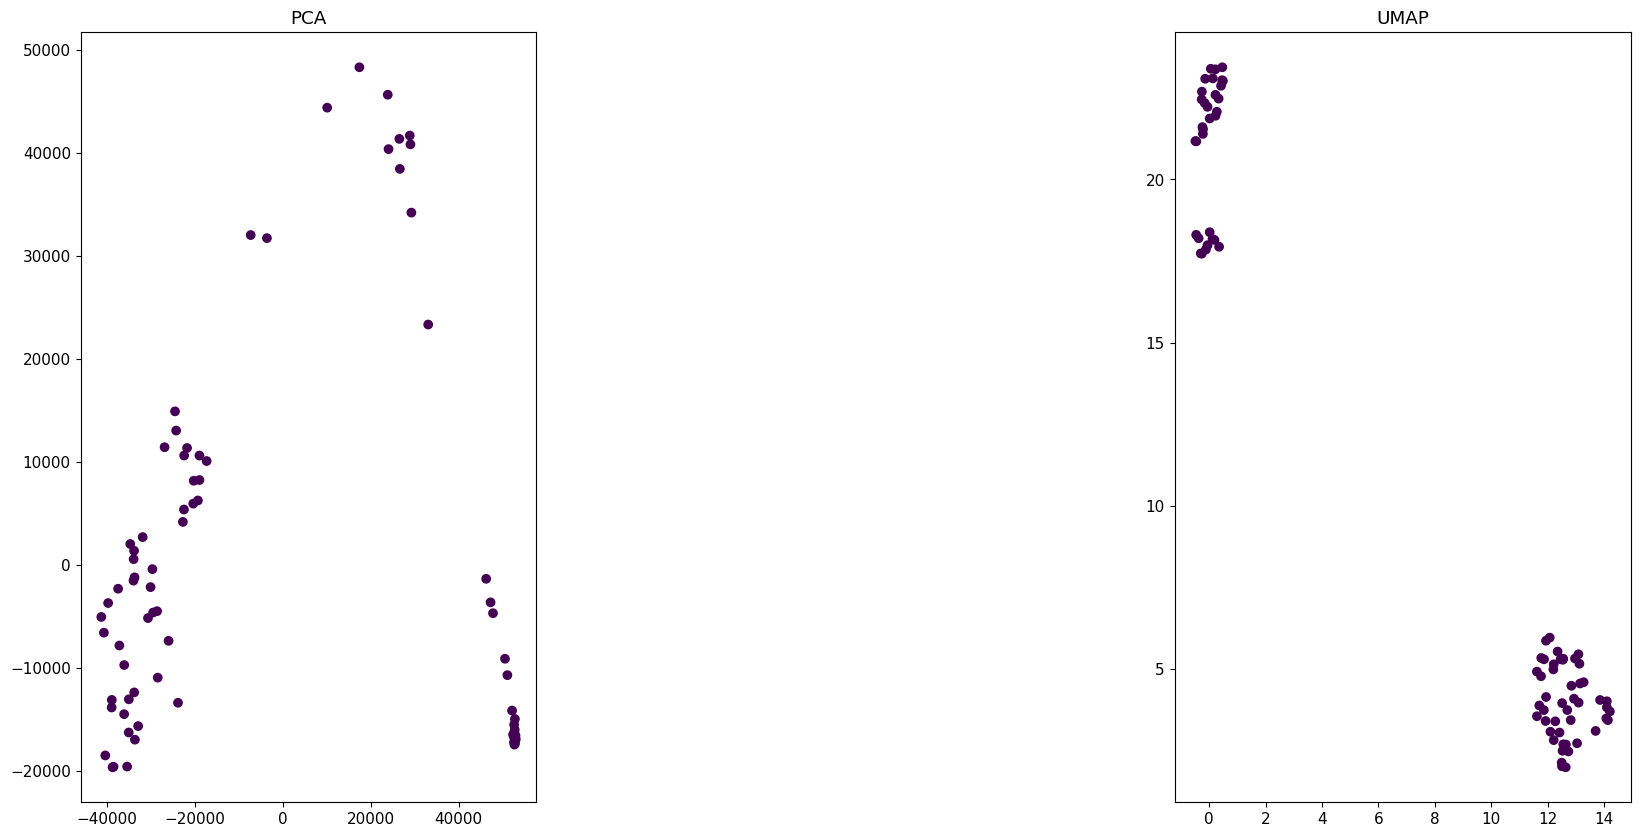

In [27]:
# plot the embeddings
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1],
            c=labels_pca, cmap='viridis')   
plt.title('PCA')

# plt.subplot(1, 3, 2)
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
# plt.title('TSNE')

plt.subplot(1, 3, 3)
plt.scatter(X_umap[:, 0], X_umap[:, 1],
            c=labels_umap, cmap='viridis')
plt.title('UMAP')
# save the fig from the number of samples
plt.savefig(f'{num_samples}_pca_umap_akita_dog.png')

plt.show()

In [89]:
plt.figure()
plt.plot([1, 2, 3, 4])
plt.show()

In [2]:
import torch
from PIL import Image

# load the model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\Austin/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-1-22 Python-3.10.11 torch-2.1.2+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [34]:
import cv2
import numpy as np

video_file = 'Dog Walk Cycle Animation Reference - 24fps.mp4'
detected_frames = []

# an assumed width and height to resize
width = 640
height = 640


# create a VideoCapture object
cap = cv2.VideoCapture(video_file)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error opening the video file")
else:
    while cap.isOpened():
        # Read the video file frame by frame
        ret, frame = cap.read()

        # only take the first 40 frames
        if cap.get(1) > 40:
            break

        # Check if the frame is valid
        if not ret:
            print("Frame is not valid")
            break

        # convert the frame to PIL Image
        frame_pil = Image.fromarray(frame)

        # run inference on the frame
        results = model(frame_pil)

        # get the dog class
        dog_class = 16

        # get the bounding boxes of the detected dogs
        xmin, ymin, xmax, ymax = results.xyxy[0][results.xyxy[0][:, 5] == 16].numpy()[0][:4]

        # crop to the bounding box of the detected dog but maintain the (width and height)
        frame_cropped = frame[int(ymin):int(ymax), int(xmin):int(xmax)]
        frame_cropped = cv2.resize(frame_cropped, (int(width), int(height)))
        # # if the frame_cropped size is less than width and height, then pad the frame if greater resize
        # if frame_cropped.shape[0] < height or frame_cropped.shape[1] < width:
        #     # pad the frame
        #     frame_cropped = cv2.copyMakeBorder(frame_cropped, 0, height - frame_cropped.shape[0], 0, width - frame_cropped.shape[1], cv2.BORDER_CONSTANT)
        # else:
        #     # resize the frame
        #     frame_cropped = cv2.resize(frame_cropped, (int(width), int(height)))
        

        # append the cropped frame to the list of detected frames
        detected_frames.append(frame_cropped)        

        # visualize the results
        # results.show()

        # print the results
        # print(results.pandas().xyxy[0])

        # Display the frame
        cv2.imshow('frame', frame_cropped)

        # Press q to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    # Release the video capture object and close the window
    cap.release()
    cv2.destroyAllWindows()

# convert the list of detected frames to a numpy array
detected_frames = np.array(detected_frames)

In [22]:
import cv2
import numpy as np
from PIL import Image

video_file = 'Dog Walk Cycle Animation Reference - 24fps.mp4'
detected_frames = []

# assumed width and height to resize
width = 640
height = 640

# create a VideoCapture object
cap = cv2.VideoCapture(video_file)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error opening the video file")
else:
    while cap.isOpened():
        # Read the video file frame by frame
        ret, frame = cap.read()

        # only take the first 40 frames
        # if cap.get(1) > 40:
        #     break

        # Check if the frame is valid
        if not ret:
            print("Frame is not valid")
            break

        # convert the frame to PIL Image
        frame_pil = Image.fromarray(frame)

        # run inference on the frame
        results = model(frame_pil)

        # get the dog class
        dog_class = 16

        # get the bounding boxes of the detected dogs
        xmin, ymin, xmax, ymax = results.xyxy[0][results.xyxy[0][:, 5] == 16].numpy()[0][:4]

        # crop to the bounding box of the detected dog
        frame_cropped = frame[int(ymin):int(ymax), int(xmin):int(xmax)]

        # Resize while maintaining the aspect ratio
        aspect_ratio = frame_cropped.shape[1] / frame_cropped.shape[0]
        if aspect_ratio > width / height:
            new_width = width
            new_height = int(width / aspect_ratio)
        else:
            new_width = int(height * aspect_ratio)
            new_height = height

        frame_resized = cv2.resize(frame_cropped, (new_width, new_height))

        # Create a black canvas with the specified width and height
        canvas = np.zeros((height, width, frame_resized.shape[2]), dtype=np.uint8)

        # Calculate the position to paste the resized image on the canvas
        x_offset = (width - new_width) // 2
        y_offset = (height - new_height) // 2

        # Paste the resized image onto the canvas
        canvas[y_offset:y_offset + new_height, x_offset:x_offset + new_width] = frame_resized

        # append the cropped and resized frame to the list of detected frames
        detected_frames.append(canvas)

        # Display the frame
        cv2.imshow('frame', canvas)

        # Press q to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object and close the window
    cap.release()
    cv2.destroyAllWindows()

# convert the list of detected frames to a numpy array
detected_frames = np.array(detected_frames)


Frame is not valid


In [7]:
detected_frames.shape

(79, 640, 640, 3)

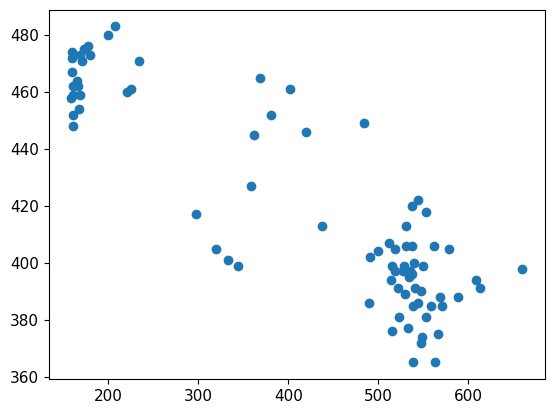

In [107]:
# plot the distribution of the detected frames list of arrays
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
# plt.hist() # the height
plt.scatter([frame.shape[1] for frame in detected_frames], [frame.shape[0] for frame in detected_frames]) # the width
plt.show()

In [103]:
detected_frames[0].shape[0]

377

In [76]:
import cv2
import numpy as np
from PIL import Image

# Assuming `model` is your detection model

video_file = 'Dog Walk Cycle Animation Reference - 24fps.mp4'
detected_frames = []

# an assumed width and height to resize
width = 594.278198 - 61.441711
height = 537.845337 - 160.162064


# create a VideoCapture object
cap = cv2.VideoCapture(video_file)

# Check if the video file is opened successfully
if not cap.isOpened():
    print("Error opening the video file")
else:
    while cap.isOpened():
        # Read the video file frame by frame
        ret, frame = cap.read()

        # Check if the frame is valid
        if not ret:
            print("Frame is not valid")
            break

        # convert the frame to PIL Image
        frame_pil = Image.fromarray(frame)

        # run inference on the frame
        results = model(frame_pil)

        # get the dog class
        dog_class = 16

        # get the bounding boxes of the detected dogs
        dog_boxes = results.xyxy[0][results.xyxy[0][:, 5] == dog_class].numpy()

        # loop over each detected dog
        for box in dog_boxes:
            xmin, ymin, xmax, ymax = box[:4]

            # crop the frame to the bounding box and resize it to a fixed size
            frame_cropped_resized = cv2.resize(frame[int(ymin):int(ymax), int(xmin):int(xmax)], (width, height))

            # append the resized cropped frame to the list of detected frames
            detected_frames.append(frame_cropped_resized)

        # visualize the results
        # results.show()

        # print the results
        # print(results.pandas().xyxy[0])

        # Display the frame
        cv2.imshow('frame', frame)

        # Press q to quit
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the video capture object and close the window
    cap.release()
    cv2.destroyAllWindows()

# convert the list of detected frames to a numpy array
detected_frames = np.array(detected_frames)


Frame is not valid


In [63]:
frame

In [71]:
detected_frames = []
results = model(frame)
# get the bounding boxes of the detected dogs
dog_boxes = results.xyxy[0][results.xyxy[0][:, 5] == dog_class].numpy()

# loop over each detected dog
for box in dog_boxes:
    xmin, ymin, xmax, ymax = box[:4]

    print(xmin, ymin, xmax, ymax)

    # # crop the frame to the bounding box and resize it to a fixed size
    # frame_cropped_resized = cv2.resize(frame[int(ymin):int(ymax), int(xmin):int(xmax)], (width, height))

    # # append the resized cropped frame to the list of detected frames
    # detected_frames.append(frame_cropped_resized)

61.44171 160.16206 594.2782 537.84534


In [39]:
model.names.items()


dict_items([(0, 'person'), (1, 'bicycle'), (2, 'car'), (3, 'motorcycle'), (4, 'airplane'), (5, 'bus'), (6, 'train'), (7, 'truck'), (8, 'boat'), (9, 'traffic light'), (10, 'fire hydrant'), (11, 'stop sign'), (12, 'parking meter'), (13, 'bench'), (14, 'bird'), (15, 'cat'), (16, 'dog'), (17, 'horse'), (18, 'sheep'), (19, 'cow'), (20, 'elephant'), (21, 'bear'), (22, 'zebra'), (23, 'giraffe'), (24, 'backpack'), (25, 'umbrella'), (26, 'handbag'), (27, 'tie'), (28, 'suitcase'), (29, 'frisbee'), (30, 'skis'), (31, 'snowboard'), (32, 'sports ball'), (33, 'kite'), (34, 'baseball bat'), (35, 'baseball glove'), (36, 'skateboard'), (37, 'surfboard'), (38, 'tennis racket'), (39, 'bottle'), (40, 'wine glass'), (41, 'cup'), (42, 'fork'), (43, 'knife'), (44, 'spoon'), (45, 'bowl'), (46, 'banana'), (47, 'apple'), (48, 'sandwich'), (49, 'orange'), (50, 'broccoli'), (51, 'carrot'), (52, 'hot dog'), (53, 'pizza'), (54, 'donut'), (55, 'cake'), (56, 'chair'), (57, 'couch'), (58, 'potted plant'), (59, 'bed'),

In [18]:
results = model(frame)

# subset onl

In [43]:
results.pandas().xyxy[0][results.pandas().xyxy[0]['class'] == 16].values[0][:4]

array([61.44171142578125, 160.1620635986328, 594.2781982421875, 537.8453369140625], dtype=object)

In [42]:
results.xyxy[0][results.xyxy[0][:, 5] == 16].numpy()[0][:4]

array([     61.442,      160.16,      594.28,      537.85], dtype=float32)

In [19]:
model(frame).pandas().xyxy[0][model(frame).pandas().xyxy[0]['name'] == 'dog']

,xmin,ymin,xmax,ymax,confidence,class,name
1,61.441711,160.162064,594.278198,537.845337,0.853881,16,dog


In [74]:
width = 594.278198 - 61.441711
height = 537.845337 - 160.162064
print(width, height)

532.836487 377.683273


In [88]:
import numpy as np
from sklearn.decomposition import PCA
from umap import UMAP
from sklearn.cluster import KMeans
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input
import matplotlib.pyplot as plt

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Assuming you have a list of image paths as X_paths
# X_paths = ["path/to/image1.jpg", "path/to/image2.jpg", ...]

# Load and preprocess images to obtain feature vectors
# X_images = [image.load_img(img_path, target_size=(224, 224)) for img_path in X_paths]
# X_array = np.array([image.img_to_array(img) for img in X_images])
X_preprocessed = preprocess_input(frames)

# Extract features using VGG16
X_features = base_model.predict(X_preprocessed)

# Flatten the features
X_flatten = X_features.reshape(X_features.shape[0], -1)

# Number of components for dimensionality reduction
n_components = 2
random_state = 42

# KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=random_state)
kmeans_labels = kmeans.fit_predict(X_flatten)

# PCA
pca = PCA(n_components=n_components, random_state=random_state)
X_pca = pca.fit_transform(X_flatten)

# UMAP
umap = UMAP(n_components=n_components, random_state=random_state)
X_umap = umap.fit_transform(X_flatten)

# KMeans clustering on reduced dimensions
kmeans_pca_labels = kmeans.fit_predict(X_pca)
kmeans_umap_labels = kmeans.fit_predict(X_umap)

# Visualize the results
plt.figure(figsize=(12, 4))

# PCA plot
plt.subplot(131)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca_labels, cmap='viridis')
plt.title('PCA')

# UMAP plot
plt.subplot(133)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_umap_labels, cmap='viridis')
plt.title('UMAP')

plt.show()


58889256/58889256 [==============================] - 15s 0us/step


c:\Users\Austin\Desktop\Agent\animal-pose-estimation\.venv\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


ResourceExhaustedError: OOM when allocating tensor with shape[32,720,1280,64] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node block1_conv2/Relu}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.


In [42]:
# examine the poses using DeepLabCut
import deeplabcut

superanimal_name = 'superanimal_quadruped'  # Update the superanimal_name variable

# The purpose of the scale list is to aggregate predictions from various image sizes. We anticipate the appearance size of the animal in the images to be approximately 400 pixels.
scale_list = range(0, 1280)

# Update the video_file variable with the correct file path
video_file = 'Dog Walk Cycle Animation Reference - 24fps.mp4'

deeplabcut.video_inference_superanimal([video_file], superanimal_name, scale_list=scale_list,
                                       video_adapt=False, videotype='.mp4')


superanimal_quadruped not available. Available ones are:  ['full_human', 'full_cat', 'full_dog', 'primate_face', 'mouse_pupil_vclose', 'horse_sideview', 'full_macaque', 'superanimal_topviewmouse_dlcrnet', 'superanimal_quadruped_dlcrnet', 'superanimal_topviewmouse_hrnetw32', 'superanimal_quadruped_hrnetw32']


IndexError: list index out of range

In [ ]:
# examine the poses using DeepLabCut
import deeplabcut

# Make sure the superanimal_name corresponds to a valid model in your DeepLabCut setup
superanimal_name = 'valid_model_name'  # Update the superanimal_name variable

# The purpose of the scale list is to aggregate predictions from various image sizes. We anticipate the appearance size of the animal in the images to be approximately 400 pixels.
scale_list = range(200, 720, 1280)

# Update the video_file variable with the correct file path
video_file = 'Dog Walk Cycle Animation Reference - 24fps.mp4'

deeplabcut.video_inference_superanimal([video_file], superanimal_name, scale_list=scale_list,
                                       video_adapt=False, videotype='.mp4')

In [24]:
deeplabcut.video_inference_superanimal?

Signature:
deeplabcut.video_inference_superanimal(
    videos,
    superanimal_name,
    scale_list=[],
    videotype='.mp4',
    video_adapt=False,
    plot_trajectories=True,
    pcutoff=0.1,
    adapt_iterations=1000,
    pseudo_threshold=0.1,
)
Docstring:
   Makes prediction based on a super animal model. Note right now we only support single animal video inference

   The index of the trained network is specified by parameters in the config file (in particular the variable 'snapshotindex')

   Output: The labels are stored as MultiIndex Pandas Array, which contains the name of the network, body part name, (x, y) label position 

           in pixels, and the likelihood for each frame per body part. These arrays are stored in an efficient Hierarchical Data Format (HDF) 

           in the same directory, where the video is stored.

   Parameters
   ----------
   videos: list
       A list of strings containing the full paths to videos for analysis or a path to the directory, where 

In [17]:
['full_human', 'full_cat', 'full_dog', 'primate_face', 'mouse_pupil_vclose', 'horse_sideview', 'full_macaque', 'superanimal_topviewmouse_dlcrnet', 'superanimal_quadruped_dlcrnet', 'superanimal_topviewmouse_hrnetw32', 'superanimal_quadruped_hrnetw32']

['full_human',
 'full_cat',
 'full_dog',
 'primate_face',
 'mouse_pupil_vclose',
 'horse_sideview',
 'full_macaque',
 'superanimal_topviewmouse_dlcrnet',
 'superanimal_quadruped_dlcrnet',
 'superanimal_topviewmouse_hrnetw32',
 'superanimal_quadruped_hrnetw32']

Read the .mat files to view the pose data

In [11]:
import os

# get the path to the directory
horse_landmarks_dir = os.path.join(os.getcwd(), 'landmarks\horse')

In [13]:
import os
import scipy.io

# Get the path to the file
file_path = os.path.join(horse_landmarks_dir, '102.mat')

# Load the .mat file
data = scipy.io.loadmat(file_path)

# Access the data in the .mat file
# For example, to access a variable named 'horse_landmarks':
# horse_landmarks = data['horse_landmarks']
# data

Load all the files to a list

In [ ]:
landmarks = []
# loop through the landmark files
for file in os.listdir(horse_landmarks_dir):
    try:
        # get the path to the file
        file_path = os.path.join(horse_landmarks_dir, file)

        # load the .mat file
        data = scipy.io.loadmat(file_path)['landmarks']
        

        # pass arrays with less than 100 frames
        if data.shape[0] < 100:
            continue

        # truncate to the first 100 frames
        data = data[:100]
        print(data.shape)
        # access the data in the .mat file
        # for example, to access a variable named 'horse_landmarks':
        # horse_landmarks = data['horse_landmarks']
        landmarks.append(data)
    except:
        print(f"Error loading file: {file}")

Handling different length of video frames

In [37]:
np.array(landmarks).shape

(60, 100, 1)

In [41]:
landmarks.shape

(60, 100, 1)

In [138]:
len(data['landmarks'])

161

In [82]:
import pandas as pd
import numpy as np

# Assuming `arr` is your structured numpy array
arr = data['landmarks'][0][0][0]

# Convert the structured numpy array to a pandas DataFrame
df_positions = pd.DataFrame(arr['positions'][0], columns=['x', 'y'])
df_present = pd.DataFrame(arr['present'][0], columns=['present'])

# Concatenate the two dataframes
df = pd.concat([df_positions, df_present], axis=1)

print(df)

      x    y  present
0   233   72        1
1     0    0        0
2   225   90        1
3   240  164        1
4   273  164        1
5   321  155        1
6     0    0        0
7   297   81        1
8   248  148        1
9   267  149        1
10  319  137        1
11  306  128        1
12  266   91        1
13    0    0        0
14  263  116        1
15  244  113        1
16  310  101        1
17    0    0        0
18  247   81        1


In [87]:
df.T

,0,1,2,3,4,...,14,15,16,17,18
x,233,0,225,240,273,...,263,244,310,0,247
y,72,0,90,164,164,...,116,113,101,0,81
present,1,0,1,1,1,...,1,1,1,0,1


In [101]:
import pandas as pd
import numpy as np

# Assuming `data` is your structured numpy array
# data = data['landmarks']

# Create an empty DataFrame
df = pd.DataFrame()

# Loop over each structured numpy array in the list
for i, arr in enumerate(data):
    # Convert the structured numpy array to a pandas DataFrame
    df_positions = pd.DataFrame(arr[0][0]['positions'][0], columns=[f'x_{i}', f'y_{i}'])
    df_present = pd.DataFrame(arr[0][0]['present'][0], columns=[f'present_{i}'])

    # Concatenate the two dataframes
    df_temp = pd.concat([df_positions, df_present], axis=1)

    # Append the temporary DataFrame to the main DataFrame
    df = pd.concat([df, df_temp], axis=1)

# df

In [103]:
df.T

,0,1,2,3,4,...,14,15,16,17,18
x_0,233,0,225,240,273,...,263,244,310,0,247
y_0,72,0,90,164,164,...,116,113,101,0,81
present_0,1,0,1,1,1,...,1,1,1,0,1
x_1,232,0,223,243,276,...,263,243,309,0,246
y_1,72,0,89,164,164,...,117,113,101,0,81
...,...,...,...,...,...,...,...,...,...,...,...
y_159,81,0,103,201,177,...,143,139,120,0,94
present_159,1,0,1,1,1,...,1,1,1,0,1
x_160,217,0,201,268,271,...,259,233,312,0,233
y_160,81,0,103,201,177,...,143,139,120,0,94


In [104]:
df

,x_0,y_0,present_0,x_1,y_1,...,y_159,present_159,x_160,y_160,present_160
0,233,72,1,232,72,...,81,1,217,81,1
1,0,0,0,0,0,...,0,0,0,0,0
2,225,90,1,223,89,...,103,1,201,103,1
3,240,164,1,243,164,...,201,1,268,201,1
4,273,164,1,276,164,...,177,1,271,177,1
5,321,155,1,325,158,...,187,1,333,187,1
6,0,0,0,320,156,...,185,1,288,185,1
7,297,81,1,296,80,...,94,1,302,94,1
8,248,148,1,250,149,...,180,1,267,180,1
9,267,149,1,268,149,...,176,1,243,176,1


In [117]:
len(data[0][0][0][0][0])

19

In [109]:
len(data)

161

In [118]:
# SET THE index from frame 0 to length of the array
df.index = [f'frame_{i}' for i in range(len(data[0][0][0][0][0]))]

In [119]:
df

,x_0,y_0,present_0,x_1,y_1,...,y_159,present_159,x_160,y_160,present_160
frame_0,233,72,1,232,72,...,81,1,217,81,1
frame_1,0,0,0,0,0,...,0,0,0,0,0
frame_2,225,90,1,223,89,...,103,1,201,103,1
frame_3,240,164,1,243,164,...,201,1,268,201,1
frame_4,273,164,1,276,164,...,177,1,271,177,1
frame_5,321,155,1,325,158,...,187,1,333,187,1
frame_6,0,0,0,320,156,...,185,1,288,185,1
frame_7,297,81,1,296,80,...,94,1,302,94,1
frame_8,248,148,1,250,149,...,180,1,267,180,1
frame_9,267,149,1,268,149,...,176,1,243,176,1


In [6]:
'''
Load the .mat files
# generate a dataframe for each file
# apend the dataframes to dataframe with each file added to the bottom from 0 to the lenth of the first array
'''

import os
import scipy.io
import pandas as pd
import numpy as np

# get the path to the directory
horse_landmarks_dir = os.path.join(os.getcwd(), 'landmarks\horse')

# get the list of files in the directory
files = os.listdir(horse_landmarks_dir)

# sort the files
files.sort()

# create an empty dataframe
df = pd.DataFrame()
df_list = []

# loop over each file
for i, file in enumerate(files):
    # get the path to the file
    file_path = os.path.join(horse_landmarks_dir, file)
    print(i)

    # load the .mat file
    data = scipy.io.loadmat(file_path)['landmarks']

    # load to a dataframe
    df_temp = pd.DataFrame()

    # loop over each structured numpy array in the list
    for i, arr in enumerate(data):

        df_positions = pd.DataFrame(arr[0][0]['positions'][0], columns=[f'x_{i}', f'y_{i}'])
        df_present = pd.DataFrame(arr[0][0]['present'][0], columns=[f'present_{i}'])

        # concatenate the dataframes
        df_temp2 = pd.concat([df_positions, df_present], axis=1)

        # append th the temp1 dataframe
        df_temp = pd.concat([df_temp, df_temp2], axis=1)

    # rename index to the range of the frames
    df_list.append(df_temp)
pd.concat(df_list)
        
    


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79


ValueError: Unknown mat file type, version 72, 111

In [10]:
pd.concat(df_list,axis=1)

,x_0,y_0,present_0,x_1,y_1,present_1,x_2,y_2,present_2,x_3,...,present_102,x_103,y_103,present_103,x_104,y_104,present_104,x_105,y_105,present_105
0,188,66,1,188,66,1,185,64,1,182,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,171,98,1,171,98,1,168,96,1,164,...,0,0,0,0,0,0,0,0,0,0
3,165,200,1,165,200,1,0,0,0,0,...,1,176,137,1,0,0,0,0,0,0
4,0,0,0,0,0,0,172,189,1,0,...,1,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,1,161,158,1,0,0,0,0,0,0
6,251,214,1,251,214,1,0,0,0,0,...,1,170,146,1,0,0,0,0,0,0
7,328,102,1,328,102,1,326,101,1,323,...,1,162,97,1,0,0,0,0,0,0
8,192,172,1,192,172,1,193,173,1,196,...,0,0,0,0,0,0,0,0,0,0
9,188,156,1,188,156,1,183,153,1,178,...,1,174,131,1,0,0,0,0,0,0


In [92]:
df.T

,0,1,2,3,4,...,14,15,16,17,18
x_0,233,0,225,240,273,...,263,244,310,0,247
y_0,72,0,90,164,164,...,116,113,101,0,81
present_0,1,0,1,1,1,...,1,1,1,0,1
x_1,232,0,223,243,276,...,263,243,309,0,246
y_1,72,0,89,164,164,...,117,113,101,0,81
...,...,...,...,...,...,...,...,...,...,...,...
y_159,81,0,103,201,177,...,143,139,120,0,94
present_159,1,0,1,1,1,...,1,1,1,0,1
x_160,217,0,201,268,271,...,259,233,312,0,233
y_160,81,0,103,201,177,...,143,139,120,0,94


In [31]:
# read the video files
horse_videos_dir = os.path.join(os.getcwd(), 'videos\horse')

# read a file example
horse_sample_vid = os.path.join(horse_videos_dir, '102.avi')

# read the video file
import cv2

vid = cv2.VideoCapture(horse_sample_vid)

# get the frame count
frame_count = int(vid.get(cv2.CAP_PROP_FRAME_COUNT))
print(frame_count)

# show the video
while vid.isOpened():
    ret, frame = vid.read()
    if ret:
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        print("Frame is not valid")
        break
vid.release()
cv2.destroyAllWindows()

161
Frame is not valid


In [42]:
landmarks = np.array([scipy.io.loadmat(os.path.join(horse_landmarks_dir, file))['landmarks'][:100] for file in os.listdir(horse_landmarks_dir) 
                      if file.endswith('.mat') if scipy.io.loadmat(os.path.join(horse_landmarks_dir, file))['landmarks'].shape[0] >= 100])


In [43]:
landmarks.shape

(60, 100, 1)

In [44]:
# split into training and test sets
from sklearn.model_selection import train_test_split

# split into training and test sets
train, test = train_test_split(landmarks, test_size=0.2, random_state=42)

In [46]:
print(train.shape)
print(test.shape)

(48, 100, 1)
(12, 100, 1)


In [63]:
train[0][1][0]['positions'][0][0]

array([[209, 132],
       [  0,   0],
       [201, 150],
       [265, 209],
       [212, 205],
       [272, 208],
       [316, 205],
       [296, 136],
       [252, 191],
       [226, 185],
       [290, 187],
       [310, 181],
       [250, 147],
       [  0,   0],
       [253, 168],
       [  0,   0],
       [300, 161],
       [  0,   0],
       [228, 138]], dtype=uint16)

In [64]:
train[0][0][0]['positions'][0][0]

array([[208, 133],
       [  0,   0],
       [200, 151],
       [264, 211],
       [215, 206],
       [267, 208],
       [316, 205],
       [294, 136],
       [254, 190],
       [223, 184],
       [288, 187],
       [309, 182],
       [249, 147],
       [  0,   0],
       [252, 168],
       [  0,   0],
       [299, 161],
       [  0,   0],
       [227, 138]], dtype=uint16)

The landmarks array represent the poses for animals and are assumed to be their signature for movement<br>
A Siamese network with contrastive loss is used to train the model<br>
During training, create pairs of poses. Positive pairs consist of poses from the same video frame, while negative pairs consist of poses from different frames. The loss function is then calculated based on the distance between the two poses in the pair. The model is trained to minimize the distance between positive pairs and maximize the distance between negative pairs.<br>
The training is an unsupervised learning process.



In [69]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import numpy as np

# Assuming you have a function get_landmarks_data() to load your landmarks data
# Load your landmarks data in the shape (number of different pairs, number of frames, 2)
landmarks_data = landmarks

# Define the Siamese network architecture
def siamese_network(input_shape):
    model_input = layers.Input(shape=input_shape)
    model = models.Sequential([
        layers.LSTM(128, return_sequences=True),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
    ])
    encoded_input = model(model_input)
    siamese_model = models.Model(model_input, encoded_input)
    return siamese_model

# Contrastive loss function
def contrastive_loss(y_true, y_pred):
    margin = 1
    return tf.reduce_mean(y_true * tf.square(y_pred) + (1 - y_true) * tf.square(tf.maximum(margin - y_pred, 0)))

# Create pairs of positive and negative samples
def create_pairs(data):
    pairs = []
    labels = []
    num_samples, num_frames, _ = data.shape

    for i in range(num_samples):
        for j in range(num_frames):
            positive_frame = data[i, j, :]
            negative_frame_index = np.random.choice(num_frames - 1)
            negative_frame = data[i, negative_frame_index, :]

            pairs += [[positive_frame, negative_frame]]
            labels += [1]  # 1 for positive pair

            # Create a negative pair with a different index
            different_sample_index = np.random.choice(num_samples - 1)
            negative_frame_different_sample = data[different_sample_index, negative_frame_index, :]

            pairs += [[positive_frame, negative_frame_different_sample]]
            labels += [0]  # 0 for negative pair

    return np.array(pairs), np.array(labels)

# Split the data into training and validation sets
train_data, val_data = train_test_split(landmarks_data, test_size=0.2, random_state=42)

# Create pairs for training and validation
train_pairs, train_labels = create_pairs(train_data)
val_pairs, val_labels = create_pairs(val_data)

# Create and compile the Siamese network
input_shape = (100, 1)  # Adjust based on your data
siamese_model = siamese_network(input_shape)

siamese_model.compile(optimizer='adam', loss=contrastive_loss)

# Train the Siamese network
siamese_model.fit([train_pairs[:, 0], train_pairs[:, 1]], train_labels,
                  validation_data=([val_pairs[:, 0], val_pairs[:, 1]], val_labels),
                  epochs=10, batch_size=32)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

In [48]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Flatten, Dense, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow_addons.losses import ContrastiveLoss

# Define the Siamese network architecture
def siamese_network(input_shape):
    # Define the input layer
    input = Input(shape=input_shape)

    # Flatten the input
    x = Flatten()(input)

    # Define the fully connected layers
    x = Dense(128, activation='relu')(x)
    x = Dense(64, activation='relu')(x)
    x = Dense(32, activation='relu')(x)

    # Define the output layer
    output = Dense(16, activation='relu')(x)

    # Create the Siamese network model
    model = Model(inputs=input, outputs=output)

    return model

# Define the contrastive loss function
def contrastive_loss(y_true, y_pred):
    margin = 1.0
    return ContrastiveLoss(margin=margin)(y_true, y_pred)

# Create the Siamese network model
input_shape = (100,1)  # Replace num_features with the actual number of features in your landmarks array
siamese_model = siamese_network(input_shape)

# Compile the model
siamese_model.compile(optimizer=Adam(), loss=contrastive_loss)

# Train the model
siamese_model.fit(train, epochs=10, batch_size=32)


ModuleNotFoundError: No module named 'tensorflow_addons'